In [1]:
# import general classes for data processing
import ruptures as rpt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

# plotting cmap
from matplotlib.cm import get_cmap

# import for loop and XGboost
from tqdm.notebook import tqdm

# import MLP
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('assets\data_rem.csv')

subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")
subjects.remove("Alex")
subjects.remove("David")
subjects.remove("Francisco")

df = df[df['subject'].isin(subjects)]
subjects

['Aarushi', 'Ester', 'Imen', 'Lluis', 'Sergi', 'Sergio']

In [3]:
# no need to run this, we are loading the saved matrices in the next section

test_sets = [1, 2, 3]
train_sets = [1, 2, 3]

subjects = list(df.subject.unique())
num_subjects = len(subjects)
num_test_sets = len(test_sets)
num_train_sets = len(train_sets)

accuracies_pre = np.zeros((num_subjects,))
accuracies_post = np.zeros((num_subjects, num_train_sets, num_test_sets))

for subject_idx, person_test in  tqdm(enumerate(subjects)):

    model = MLPClassifier(random_state=1,hidden_layer_sizes =50,max_iter=500)

    selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
    'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
    'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
    'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
    'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
    'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
    'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
    'iatd_7']

    df_train = df[(df['subject'] != person_test)]
    df_test = df[(df['subject'] == person_test)]

    X_train = df_train[selected_columns]
    y_train = df_train['gesture']
    X_test = df_test[selected_columns]
    y_test = df_test['gesture']        

    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(y_train)
    y_train = Y_encoded 

    Y_encoded2 = label_encoder.fit_transform(y_test)
    y_test = Y_encoded2 

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    predicted_labels_decoded = label_encoder.inverse_transform(predictions)

    accuracy_pre = accuracy_score(y_test, predictions)*100
    accuracies_pre[subject_idx] = accuracy_pre

    for train_idx, Take_to_train in enumerate(train_sets):
        for test_idx, Take_to_test in enumerate(test_sets):

            df2 = df[(df['subject'] == person_test)] 
            model2 = model

            df_train2 = df2[(df2['take'] == Take_to_train)]
            df_test2 = df2[(df2['take'] == Take_to_test)]

            X_train2 = df_train2[selected_columns]
            y_train2 = df_train2['gesture']
            X_test2 = df_test2[selected_columns]
            y_test2 = df_test2['gesture']

            label_encoder = LabelEncoder()
            Y_encoded = label_encoder.fit_transform(y_train2)
            y_train2 = Y_encoded 

            Y_encoded2 = label_encoder.fit_transform(y_test2)
            y_test2 = Y_encoded2 

            model2.partial_fit(X_train2, y_train2, classes=np.unique(y_train2))

            y_pred = model2.predict(X_test2)

            predictions = [round(value) for value in y_pred]
            predicted_labels_decoded = label_encoder.inverse_transform(predictions)
            
            accuracy_post = accuracy_score(y_test2, predictions)*100
            accuracies_post[subject_idx, train_idx, test_idx] = accuracy_post


np.save("accuracies_pre.npy", accuracies_pre)
np.save("accuracies_post.npy", accuracies_post)

0it [00:00, ?it/s]

c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\fents\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


: 

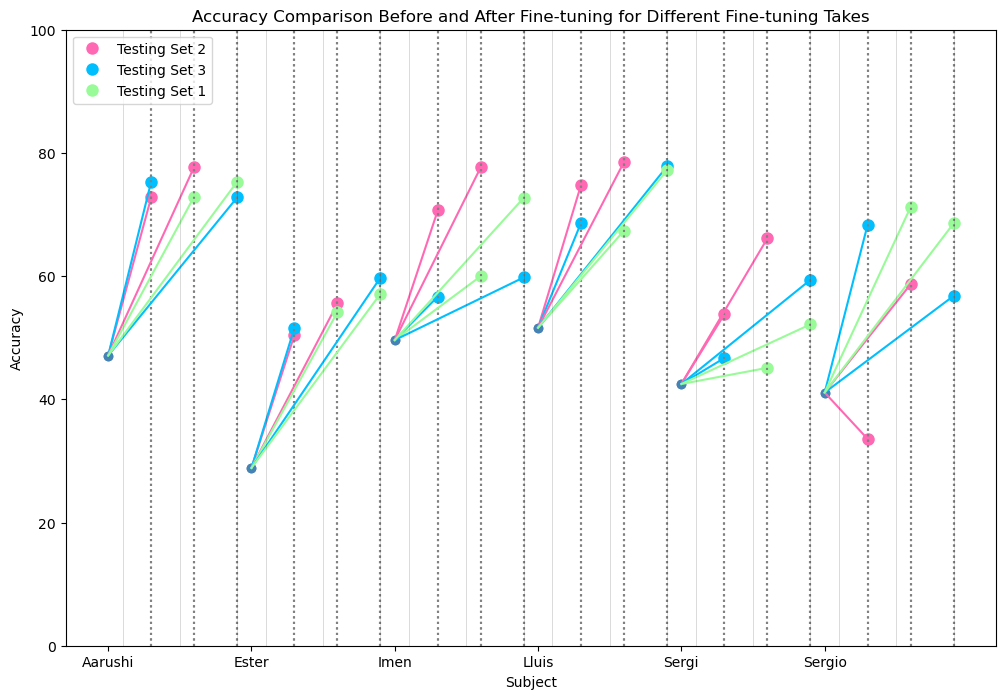

In [7]:
import numpy as np
import matplotlib.pyplot as plt

accuracies_pre = np.load("assets\\accuracies_pre.npy")
accuracies_post = np.load("assets\\accuracies_post.npy")

reshaped_accuracies = []
for matrix in accuracies_post:
    np.fill_diagonal(matrix, 0)
    non_zero_data = matrix[matrix != 0]
    reshaped_data = non_zero_data[:6].reshape(3, 2)
    reshaped_accuracies.append(reshaped_data)

initial_accuracies_matrix = np.repeat(accuracies_pre.reshape(-1, 1), 2, axis=1)

testing_set_colors = {
    2: '#FF69B4',  
    3: '#00BFFF',  
    1: '#98FB98'   
}

plt.figure(figsize=(12, 8))
subject_indices = ['Aarushi', 'Ester', 'Imen', 'Lluis', 'Sergi', 'Sergio']

for i, (initial_accuracy, fine_tuned_data) in enumerate(zip(initial_accuracies_matrix, reshaped_accuracies)):
    
    plt.plot(subject_indices[i], initial_accuracy[0], marker='o', markersize=6, color='#4682B4') 
    plt.plot(subject_indices[i], initial_accuracy[1], marker='o', markersize=6, color='#4682B4')  
    
    for j, fine_tuned_accuracy in enumerate(fine_tuned_data):
        
        fine_tuned_x_pos = i + (j + 1) * 0.3
        
        test_set_colors = [testing_set_colors[2], testing_set_colors[3]] if j == 0 else [testing_set_colors[2], testing_set_colors[1]] if j == 1 else [testing_set_colors[3], testing_set_colors[1]]
        
        for k, (accuracy, color) in enumerate(zip(fine_tuned_accuracy, test_set_colors)):
            plt.plot(fine_tuned_x_pos, accuracy, marker='o', markersize=8, color=color)
            plt.plot([i, fine_tuned_x_pos], [initial_accuracy[k], accuracy], color=color)

            plt.axvline(i + (j + 1) * 0.3, linestyle=':', color='grey')
    
    plt.axvline(i + 0.1, color='black', linewidth=0.5, alpha=0.2)
    plt.axvline(i + 0.5, color='black', linewidth=0.5, alpha=0.2)
    plt.axvline(i + 0.9, color='black', linewidth=0.5, alpha=0.2)

plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Before and After Fine-tuning for Different Fine-tuning Takes')
plt.xticks(np.arange(len(subject_indices)), subject_indices)

plt.grid(False)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Testing Set {i}') for i, color in testing_set_colors.items()]
plt.legend(handles=legend_handles)

plt.ylim(0, 100) 

plt.show()

In [16]:
# testing weird point of decrease Sergio with finetuning take 1, testing set 2

df = pd.read_csv('assets\data_rem.csv')

subjects = list(df.subject.unique())
subjects.remove("Mario")
subjects.remove("Hanaa")
subjects.remove("Alex")
subjects.remove("David")
subjects.remove("Francisco")

df = df[df['subject'].isin(subjects)]

seeds = [1,10,50]

person_test = "Sergio"
Take_to_train = 1
Take_to_test = 2

for seed_idx,random_seed in tqdm(enumerate(seeds)):

    model = MLPClassifier(random_state = random_seed,hidden_layer_sizes =50,max_iter=500)

    selected_columns = [ 'mav_0', 'mav_1', 'mav_2', 'mav_3', 'mav_4', 'mav_5', 'mav_6', 'mav_7',
    'rms_0', 'rms_1', 'rms_2', 'rms_3', 'rms_4', 'rms_5', 'rms_6', 'rms_7',
    'ssc_0', 'ssc_1', 'ssc_2', 'ssc_3', 'ssc_4', 'ssc_5', 'ssc_6', 'ssc_7',
    'wl_0', 'wl_1', 'wl_2', 'wl_3', 'wl_4', 'wl_5', 'wl_6', 'wl_7', 'var_0',
    'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'iasd_0',
    'iasd_1', 'iasd_2', 'iasd_3', 'iasd_4', 'iasd_5', 'iasd_6', 'iasd_7',
    'iatd_0', 'iatd_1', 'iatd_2', 'iatd_3', 'iatd_4', 'iatd_5', 'iatd_6',
    'iatd_7']

    df_train = df[(df['subject'] != person_test)]
    df_test = df[(df['subject'] == person_test)]

    X_train = df_train[selected_columns]
    y_train = df_train['gesture']
    X_test = df_test[selected_columns]
    y_test = df_test['gesture']        

    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(y_train)
    y_train = Y_encoded 

    Y_encoded2 = label_encoder.fit_transform(y_test)
    y_test = Y_encoded2 

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    predicted_labels_decoded = label_encoder.inverse_transform(predictions)

    accuracy_pre = accuracy_score(y_test, predictions)*100

    df2 = df[(df['subject'] == person_test)] 
    model2 = model

    df_train2 = df2[(df2['take'] == Take_to_train)]
    df_test2 = df2[(df2['take'] == Take_to_test)]

    X_train2 = df_train2[selected_columns]
    y_train2 = df_train2['gesture']
    X_test2 = df_test2[selected_columns]
    y_test2 = df_test2['gesture']

    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(y_train2)
    y_train2 = Y_encoded 

    Y_encoded2 = label_encoder.fit_transform(y_test2)
    y_test2 = Y_encoded2 

    model2.partial_fit(X_train2, y_train2, classes=np.unique(y_train2))

    y_pred = model2.predict(X_test2)

    predictions = [round(value) for value in y_pred]
    predicted_labels_decoded = label_encoder.inverse_transform(predictions)

    accuracy_post = accuracy_score(y_test2, predictions)*100
    print(accuracy_post)

0it [00:00, ?it/s]

1
42.525450973388104
10
47.74066797642436
50
47.90141096624397
